In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go

In [26]:
# 데이터베이스 table 가져오기
base_path = os.getcwd()
product = pd.read_csv(base_path + '/product_final.csv')
click_stream_new = pd.read_csv(base_path + '/click_stream_final.csv')
customer = pd.read_csv(base_path + '/customer_final.csv')
transaction_new = pd.read_csv(base_path + '/transaction_final.csv')
rfm = pd.read_csv(base_path + '/rfm.csv')
sales = pd.read_csv(base_path + '/sales.csv')

In [3]:
# 경고메세지 끄기
import warnings
warnings.filterwarnings("ignore")

In [27]:
transaction_new['created_at'] = pd.to_datetime(transaction_new['created_at'])
click_stream_new['event_time'] = pd.to_datetime(click_stream_new['event_time'])

In [28]:
click_stream_new['month'] = click_stream_new['event_time'].dt.strftime('%Y-%m')
transaction_new['month'] = transaction_new['created_at'].dt.strftime('%Y-%m')

In [31]:
transaction_new = transaction_new.merge(sales, how='left', on=['customer_id','booking_id'])

In [41]:
# 월별 매출 현황
monthly_sales = transaction_new.groupby('month', as_index=False).sales.sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x = monthly_sales['month'], y=monthly_sales['sales'], mode='lines+markers'))
title = {'text':'월별 매출 변화', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='매출', title_font=dict(size=22))
fig.update_layout(title=title, width = 1000, height = 500)

# 수직선을 그릴 위치
vertical_line_position = '2022-06'

fig.add_annotation(text='2022-06', x=vertical_line_position, y=40,
                   showarrow=False, font=dict(size=12, color='red'))
# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

## 데이터 분석

### 가설 1. 고객들의 구매전환율이 하락하여 매출이 급락하였을 것이다.

In [7]:
# 방문 세션 수
session_info = click_stream_new[click_stream_new.event_name == 'HOMEPAGE'].groupby('month', as_index=False)['session_id'].count()

# 구매 세션 수
session_info = pd.merge(session_info, click_stream_new[click_stream_new.event_name == 'BOOKING'].groupby('month').session_id.nunique(), how='left', on='month')

session_info.rename(columns = {'session_id_x':'num_visit', 'session_id_y':'num_booking'}, inplace=True)

# 구매전환율 (구매 세션 수 / 방문 세션 수)
session_info['cvr'] = round(session_info['num_booking'] / session_info['num_visit'] * 100, 2)

session_info

,month,num_visit,num_booking,cvr
0,2020-08,44782,15843,35.38
1,2020-09,44494,15373,34.55
2,2020-10,47855,16449,34.37
3,2020-11,48106,16788,34.90
4,2020-12,50713,17115,33.75
5,2021-01,51573,18109,35.11
6,2021-02,47562,16741,35.20
7,2021-03,55224,19211,34.79
8,2021-04,54759,18818,34.37
9,2021-05,55912,20063,35.88


In [8]:
# 구매 전환율
fig = go.Figure()
fig.add_trace(go.Scatter(x = session_info['month'], y=session_info['cvr'], mode='lines+markers', name='Micro_CVR'))
title = {'text':'월별 구매 전환율', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='비율(%)', range=[20, 40], title_font=dict(size=22))
fig.update_layout(title=title, width = 1000, height = 500)

# 수직선을 그릴 위치
vertical_line_position = '2022-06'

fig.add_annotation(text='2022-06', x=vertical_line_position, y=40,
                   showarrow=False, font=dict(size=12, color='red'))
# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

In [9]:
# 월별 방문 수
fig = go.Figure()
fig.add_trace(go.Scatter(x = session_info['month'], y=session_info['num_visit'], mode='lines+markers', name='Micro_CVR'))
title = {'text':'월별 방문 수', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='방문 수', range=[0,100000], title_font=dict(size=22))
fig.update_layout(title=title, width = 700, height = 500)

# 수직선을 그릴 위치
vertical_line_position = '2022-06'

fig.add_annotation(text='2022-06', x=vertical_line_position, y=100000,
                   showarrow=False, font=dict(size=12, color='red'))
# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

In [10]:
# 월별 방문 수 변화율
fig = go.Figure()
fig.add_trace(go.Scatter(x = session_info['month'], y=session_info['num_visit'].pct_change() * 100, mode='lines+markers', name='Micro_CVR'))
title = {'text':'월별 방문 수 변화율', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='방문 수 변화율 (%)', range=[-20, 20], title_font=dict(size=22))
fig.update_layout(title=title, width = 700, height = 500)

# 수직선을 그릴 위치
vertical_line_position = '2022-06'

fig.add_annotation(text='2022-06', x=vertical_line_position, y=20,
                   showarrow=False, font=dict(size=12, color='red'))
# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

In [11]:
# 월별 구매 수
fig = go.Figure()
fig.add_trace(go.Scatter(x = session_info['month'], y=session_info['num_booking'], mode='lines+markers', name='Micro_CVR'))
title = {'text':'월별 구매 수', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='구매 수', range=[0,35000], title_font=dict(size=22))
fig.update_layout(title=title, width = 700, height = 500)

# 수직선을 그릴 위치
vertical_line_position = '2022-06'

fig.add_annotation(text='2022-06', x=vertical_line_position, y=35000,
                   showarrow=False, font=dict(size=12, color='red'))
# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

In [12]:
# 월별 구매 수 변화율
fig = go.Figure()
fig.add_trace(go.Scatter(x = session_info['month'], y=session_info['num_booking'].pct_change() * 100, mode='lines+markers', name='Micro_CVR'))
title = {'text':'월별 구매 수 변화율', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='구매 수 변화율 (%)', range=[-20, 20], title_font=dict(size=22))
fig.update_layout(title=title, width = 700, height = 500)

# 수직선을 그릴 위치
vertical_line_position = '2022-06'

fig.add_annotation(text='2022-06', x=vertical_line_position, y=20,
                   showarrow=False, font=dict(size=12, color='red'))
# 수직선 추가
fig.add_shape(type='line',
              x0=vertical_line_position, y0=0, x1=vertical_line_position, y1=1,
              line=dict(color='red', dash='dash'),
              xref='x', yref='paper')

### 가설 2. VIP 고객들의 재구매율이 하락했을 것이다.

** 과거 VIP 고객들은 전체 VIP 고객들의 66%, 전체 VIP 구매액의 73%를 담당하고 있습니다. 이들의 객단가는 

이들의 재구매율 하락이 7월 매출 하락에 큰 영향을 미친 것으로 판단됩니다.

과거 VIP 정의 : 2020년 8월부터 2020년 12월에 처음으로 서비스를 이용한 VIP 고객

In [13]:
# 과거 VIP 고객 거래 데이터프레임
vip_tran = transaction_new[transaction_new['customer_id'].isin(rfm[rfm['Grade'] == 1]['customer_id'].unique())][['customer_id', 'booking_id', 'created_at', 'sales']]

# 구매 첫번째 이용일
first_use = vip_tran.groupby('customer_id', as_index=False)['created_at'].min().reset_index(drop=True)
first_use['created_at'] = first_use['created_at'].dt.strftime('%Y-%m')
first_use.rename({'created_at' : 'first_use'}, axis=1, inplace=True)

# 데이터 프레임 합치기
vip_tran = vip_tran.merge(first_use, how='left', on='customer_id')
vip_tran['created_at'] = vip_tran['created_at'].dt.strftime('%Y-%m')
vip_tran['first_use'] = pd.to_datetime(vip_tran['first_use']).dt.to_period('M')
vip_tran.drop_duplicates(inplace=True)

In [14]:
# 과거 VIP 고객 수 및 전체 VIP 고객 중 비율
print(f"과거 VIP 고객들 수 : {vip_tran[vip_tran['first_use'] <= '2020-12'].customer_id.nunique()}명")
print(f"전체 VIP 고객 중 과거 VIP 고객들 비중  : {round(vip_tran[vip_tran['first_use'] <= '2020-12'].customer_id.nunique() / vip_tran.customer_id.nunique() * 100)}%")

과거 VIP 고객들 수 : 6404명
전체 VIP 고객 중 과거 VIP 고객들 비중  : 66%


In [15]:
# 과거 VIP 고객 매출 및 전체 매출 중 비율
print(f"과거 VIP 고객들 매출 : {round(vip_tran[vip_tran['first_use'] <= '2020-12'].sales.mean())}")
print(f"전체 VIP 고객 매출 중 과거 VIP 고객들 비중  : {round(vip_tran[vip_tran['first_use'] <= '2020-12'].sales.sum() / vip_tran.sales.sum() * 100)}%")

과거 VIP 고객들 매출 : 556823
전체 VIP 고객 매출 중 과거 VIP 고객들 비중  : 73%


In [16]:
# 과거 VIP 고객들과 그 외 VIP 고객들의 객단가 비교
print(f"과거 VIP 고객들의 객단가 : {round((vip_tran[vip_tran['first_use'] <= '2020-12'].groupby('customer_id')['sales'].sum() / vip_tran[vip_tran['first_use'] <= '2020-12'].groupby('customer_id')['created_at'].count()).mean())}")
print(f"그 외 VIP 고객들의 객단가 : {round((vip_tran[vip_tran['first_use'] > '2020-12'].groupby('customer_id')['sales'].sum() /vip_tran[vip_tran['first_use'] > '2020-12'].groupby('customer_id')['created_at'].count()).mean())}")

과거 VIP 고객들의 객단가 : 588248
그 외 VIP 고객들의 객단가 : 623042


In [17]:
def cohort (df, title):
    # 분석 대상 구매 내역
    temp = transaction_new[transaction_new['customer_id'].isin(df['customer_id'].unique())][['customer_id', 'created_at']]
    
    # 구매 첫번째 이용일
    first_use = temp.groupby('customer_id', as_index=False)['created_at'].min().reset_index(drop=True)
    first_use['created_at'] = first_use['created_at'].dt.strftime('%Y-%m')
    first_use.rename({'created_at' : 'first_use'}, axis=1, inplace=True)
    
    # 데이터 프레임 합치기
    temp = temp.merge(first_use, how='left', on='customer_id')
    temp['created_at'] = temp['created_at'].dt.strftime('%Y-%m')
    
    temp['first_use'] = pd.to_datetime(temp['first_use']).dt.to_period('M')
    temp['created_at'] = pd.to_datetime(temp['created_at']).dt.to_period('M')
    temp = temp[temp['first_use'] <= temp['created_at']]

    # 코호트 분석을 위한 데이터 프레임 만들기
    co = temp.groupby(['first_use', 'created_at'], as_index=False).customer_id.nunique()
    co.rename({'customer_id': 'total_users'}, axis = 1, inplace = True)

    co['cohort_period'] = (co['created_at'] - co['first_use']).map(lambda t: t.n)
  
    
    # 재구매율 구하기
    co_retention = co.set_index(['first_use', 'cohort_period'])
    co_retention = co_retention['total_users'].unstack(1)
    retention = co_retention.div(co_retention[0],axis = 0)
    
    plt.figure(figsize=(15, 8))
    plt.title(title, fontsize=19)
    plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
    sns.heatmap(retention, annot=True, fmt='.0%')
    plt.show()

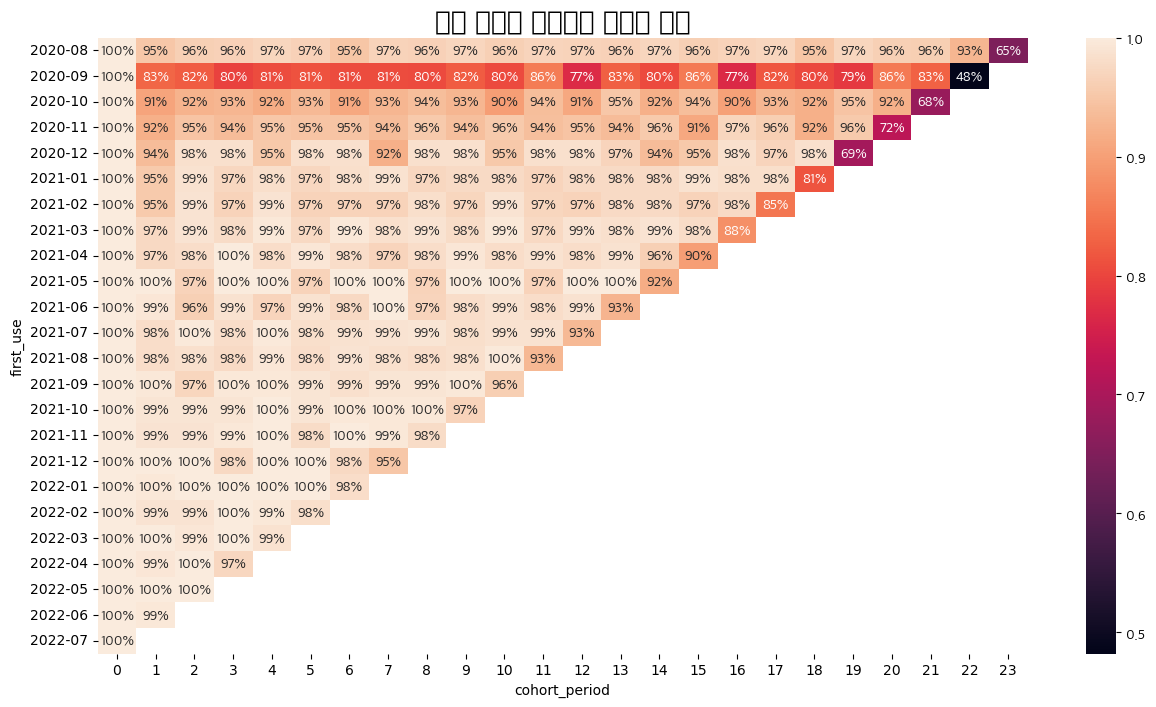

In [18]:
cohort(rfm[rfm['Grade'] == 1], '충성 고객층 재구매율 코호트 분석')

### 과거 VIP 고객들의 리텐션 하락, 구매 수 감소의 원인 추정

#### 1. 중고 의류 수요에 대한 늦은 대응

In [19]:
second_hand_search = click_stream_new[click_stream_new['search_keywords'] == 'Second Hand'].groupby('month', as_index=False).session_id.count()

# 월별 구매 수 변화율
fig = go.Figure()
fig.add_trace(go.Scatter(x = second_hand_search['month'], y=second_hand_search['session_id'], mode='lines+markers', name='Micro_CVR'))
title = {'text':'월별 중고 검색 건수', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='중고 검색 수', title_font=dict(size=22))
fig.update_layout(title=title, width = 1000, height = 500)

#### 2. 불명확한 프로모션 타겟층

In [20]:
# 월별 구매 수 대비 프로모션 이용률
promo_use_ratio = transaction_new[transaction_new['promo_code'] != 0].groupby('month').booking_id.count() / transaction_new.groupby('month').booking_id.count()
promo_use_ratio = pd.DataFrame(promo_use_ratio).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x = promo_use_ratio['month'], y=round(promo_use_ratio['booking_id'] * 100, 2), mode='lines+markers', name='Micro_CVR'))
title = {'text':'월별 구매 수 대비 프로모션 이용률', 'y':0.95,
        'x':0.5,'xanchor':'center', 'yanchor':'top', "font" : {"size":25}}
fig.update_xaxes(title='월', title_font=dict(size=22))
fig.update_yaxes(title='프로모션 이용률 (%)', range = [20, 50], title_font=dict(size=22))
fig.update_layout(title=title, width = 1000, height = 500)

#### 3. 선호 브랜드 입점 부족

In [21]:
# 선호 브랜드 입점 비율
brand = product.brand.dropna()
for famous_brand in ['adidas', 'h&m', 'converse', 'uniqlo', 'nike', 'eiger', '3second', 'nevada', 'vans', 'cardinal']:
    print(f'{famous_brand} :', round(len(brand[brand.str.contains(famous_brand)]) / len(product) * 100, 2))

adidas : 4.68
h&m : 0.0
converse : 0.39
uniqlo : 0.0
nike : 5.15
eiger : 0.0
3second : 0.0
nevada : 0.0
vans : 0.44
cardinal : 0.0


In [22]:
# 선호 브랜드 제품 비율
fig = px.pie(values=[10.66, 89.34],
                     names=['선호 브랜드', '기타 브랜드'], color_discrete_sequence=['#A0BFE0', '#4A55A2'])
fig.update_traces(pull = [0, 0.1], marker_line_color= "black",marker_line_width = 1, textinfo='percent', textfont_size=15)
fig.update_layout(
    {
        "title" : {
            "text" : "선호 브랜드 제품 비율",
            "x" : 0.5,
            "y" : 0.95,
            "font" : {"size":20}
        },
        "width" : 700
    },
    
    legend=dict(
    x=0.8, 
    y=0.93, 
    xanchor="left", 
    yanchor="middle",
    font=dict(size=16),
    traceorder='reversed'
    )
)

fig.show()